In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.preprocessing import Imputer, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset=pd.read_csv('train.csv')
y=dataset['Survived'].values
del dataset['Survived']
del dataset['Name']
del dataset['Ticket']
del dataset['PassengerId']

dataset['Has_cabin']=dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
del dataset['Cabin']

dataset['Family']=dataset['Parch'] + dataset['SibSp'] + 1
#del dataset['Parch']
#del dataset['SibSp']
dataset['Is_alone']= dataset['Family'].apply(lambda x: 0 if x > 1 else 1)

age_avg = dataset['Age'].mean()
dataset['Age']=dataset['Age'].fillna(age_avg).astype(int)
dataset.loc[ dataset['Age'] <= 16, 'Age']= 4
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 3
dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 1
dataset.loc[ dataset['Age'] > 64, 'Age'] = 0

dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median()).astype(int)
dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3 
    
dataset['Embarked']= dataset['Embarked'].fillna('C')
#dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ). astype(int)
cols = list(dataset.columns.values) 
print(cols)
#dataset=dataset[[ 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_cabin', 'Family', 'Is_alone']]
X=dataset.values
label_encoder_sex=LabelEncoder()
X[:,1]=label_encoder_sex.fit_transform(X[:,0])

label_encoder_e=LabelEncoder()
X[:,6]=label_encoder_e.fit_transform(X[:,6])

one_encoder=OneHotEncoder(categorical_features=[6])
X = one_encoder.fit_transform(X).toarray()




In [2]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test=train_test_split(X[:,1:],y,test_size=0.1,random_state=0)


estimator= ExtraTreesClassifier()
param_grid1 = {'n_estimators': [5,10,15,20,25,30,40,50],'max_features':['auto','sqrt','log2'],'criterion':["gini",'entropy']}




#selector = RFECV(estimator, step=1, cv=5)
clf1 = GridSearchCV(estimator, param_grid1, cv=10)
clf1.fit(X_train, np.ravel(y_train))
print(clf1.best_estimator_)






NameError: name 'train_test_split' is not defined

In [3]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV

for i in range(2):
    X_train, X_test, y_train, y_test=train_test_split(X[:,1:],y,test_size=0.1,random_state=0)



    param_grid1 = {'n_neighbors': [28,30,22],'leaf_size':[20,15,5]}
    estimator1 = ExtraTreesClassifier()
#selector = RFECV(estimator, step=1, cv=5)
    clf1 = GridSearchCV(estimator1, param_grid1, cv=5)
    clf1.fit(X_train, np.ravel(y_train))
    print(clf1.best_estimator_)
   # print(clf1.grid_scores_)
 #   print(clf1.ranking_)


#y_pred_lg_train=clf1.predict(X_train)
#y_pred_lg_test=clf1.predict(X_test)

#accuracies=cross_val_score(estimator=clf1, X=X_train, y=y_train, cv=10, scoring='accuracy')
"""
print(accuracies.mean())














y_pred_knn_train=knn.predict(X_train)
y_pred_knn_test=knn.predict(X_test)

accuracies=cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10, scoring='accuracy')
print(accuracies.mean())
"""

NameError: name 'train_test_split' is not defined

In [22]:
# Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    from sklearn.feature_selection import RFECV
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    estimator = LogisticRegression()
    score=cross_val_score(estimator,X_train,y_train)
    param_grid = [{'estimator__penalty': ['l1','l2'],'estimator__C':[1,1.5,2]}]
    """
    selector = RFECV(estimator, step=1, cv=5)
    clf = GridSearchCV(selector, param_grid, cv=5)
    clf.fit(X_train, np.ravel(y_train))
    print(clf.best_estimator_.estimator_)
    print(clf.best_estimator_.grid_scores_)
    print(clf.best_estimator_.ranking_)
    clf.best_estimator_.n_features_
    """
    print(score)

[0.75746269 0.70786517 0.72932331]


In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [30]:
classifier = Sequential()
classifier.add(Dense(units=5,init="uniform",activation='relu',input_dim=11))
classifier.add(Dense(units=5,init="uniform",activation='relu'))
classifier.add(Dense(units=1,init="uniform",activation='sigmoid'))
#activation='softmax')) if output categories greater than 2
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics= ['accuracy'])
#loss=category_crossentropy for output categories >2

In [32]:
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [33]:
classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
801/801 [==============================] - 0s 451us/step - loss: 0.6893 - acc: 0.6092
Epoch 2/100
801/801 [==============================] - 0s 224us/step - loss: 0.6566 - acc: 0.6130
Epoch 3/100
801/801 [==============================] - 0s 260us/step - loss: 0.5956 - acc: 0.6130
Epoch 4/100
801/801 [==============================] - 0s 167us/step - loss: 0.5625 - acc: 0.6130
Epoch 5/100
801/801 [==============================] - 0s 177us/step - loss: 0.5476 - acc: 0.6130
Epoch 6/100
801/801 [==============================] - 0s 152us/step - loss: 0.5377 - acc: 0.6130
Epoch 7/100
801/801 [==============================] - 0s 157us/step - loss: 0.5308 - acc: 0.7990
Epoch 8/100
801/801 [==============================] - 0s 207us/step - loss: 0.5247 - acc: 0.8040
Epoch 9/100
801/801 [==============================] - 0s 314us/step - loss: 0.5182 - acc: 0.8077
Epoch 10/100
801/801 [==============================] - 0s 157us/step - loss: 0.5118 - acc: 0.8065
Epoch 11/100
801/80

In [44]:
# Fitting classifier to the Training set
# Create your classifier here

# Predicting the Test set results
y_pred = classifier.predict(X_test)

y_pred=(y_pred>0.45)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [

In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  9],
       [13, 19]])

0.7777777777777778

In [37]:
svm= SVC()
svm.fit(X_train,y_train)

y_pred_svm_train=svm.predict(X_train)
y_pred_svm_test=svm.predict(X_test)

accuracies=cross_val_score(estimator=svm, X=X_train, y=y_train, cv=10, scoring='accuracy')
print(accuracies.mean())

0.8202314814814814


In [12]:

from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = [{'estimator__penalty': ['l1','l2'],'estimator__C':[1,1.5,2]}]
estimator = LogisticRegression()
selector = RFECV(estimator, step=1, cv=5)
clf = GridSearchCV(selector, param_grid, cv=5)
clf.fit(X_train, np.ravel(y_train))
print(clf.best_estimator_.estimator_)
print(clf.best_estimator_.grid_scores_)
print(clf.best_estimator_.ranking_)
#clf.best_estimator_.n_features_


y_pred_lg_train=clf.predict(X_train)
y_pred_lg_test=clf.predict(X_test)

accuracies=cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='accuracy')
print(accuracies.mean())


"""



lg= LogisticRegression()
lg.fit(X_train,y_train)

y_pred_lg_train=lg.predict(X_train)
y_pred_lg_test=lg.predict(X_test)

accuracies=cross_val_score(estimator=lg, X=X_train, y=y_train, cv=10, scoring='accuracy')
print(accuracies.mean())
"""

LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[0.65433806 0.65929138 0.6754717  0.68923005 0.70795734 0.71168405
 0.71294191 0.71668425 0.71666862 0.71291066 0.71915309]
[1 1 1 1 1 1 1 1 1 1 1]
0.7179928504453821


"\n\n\n\nlg= LogisticRegression()\nlg.fit(X_train,y_train)\n\ny_pred_lg_train=lg.predict(X_train)\ny_pred_lg_test=lg.predict(X_test)\n\naccuracies=cross_val_score(estimator=lg, X=X_train, y=y_train, cv=10, scoring='accuracy')\nprint(accuracies.mean())\n"

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=11, p=2,
           weights='uniform')
0.790318995155493
0.7928355993123926


In [19]:
nb= GaussianNB()
nb.fit(X_train,y_train)

y_pred_nb_train=nb.predict(X_train)
y_pred_nb_test=nb.predict(X_test)

accuracies=cross_val_score(estimator=nb, X=X_train, y=y_train, cv=10, scoring='accuracy')
print(accuracies.mean())

0.7652394905453977


0.812726793248945


In [41]:
etc= ExtraTreesClassifier(n_estimators=20)
etc.fit(X_train,y_train)

y_pred_etc_train=etc.predict(X_train)
y_pred_etc_test=etc.predict(X_test)

accuracies=cross_val_score(estimator=etc, X=X_train, y=y_train, cv=10, scoring='accuracy')
print(accuracies.mean())

0.8102264025629005


In [59]:
ab= AdaBoostClassifier(n_estimators=50)
ab.fit(X_train,y_train)

y_pred_ab_train=ab.predict(X_train)
y_pred_ab_test=ab.predict(X_test)

accuracies=cross_val_score(estimator=ab, X=X_train, y=y_train, cv=10, scoring='accuracy')
print(accuracies.mean())

0.8013996327551179


In [23]:
gb= GradientBoostingClassifier()
gb.fit(X_train,y_train)

y_pred_gb_train=gb.predict(X_train)
y_pred_gb_test=gb.predict(X_test)

accuracies=cross_val_score(estimator=gb, X=X_train, y=y_train, cv=10, scoring='accuracy')
print(accuracies.mean())

0.8152746522894203


In [24]:
base_predictions_train = pd.DataFrame( {
    'LG': y_pred_lg_train.ravel(),
    'NB':  y_pred_nb_train.ravel(),
    'RF' :  y_pred_rf_train.ravel(),
    'AB' :  y_pred_ab_train.ravel(),
    'GB' :  y_pred_gb_train.ravel(),
    'KNN' :  y_pred_knn_train.ravel(),
    'SVM' :  y_pred_svm_train.ravel(),
    'ETC':  y_pred_etc_train.ravel()
    })

base_predictions_test = pd.DataFrame( {
    'LG': y_pred_lg_test.ravel(),
    'NB':  y_pred_nb_test.ravel(),
    'RF' :  y_pred_rf_test.ravel(),
    'AB' :  y_pred_ab_test.ravel(),
    'GB' :  y_pred_gb_test.ravel(),
    'KNN' :  y_pred_knn_test.ravel(),
    'SVM' :  y_pred_svm_test.ravel(),
    'ETC':  y_pred_etc_test.ravel()
    })

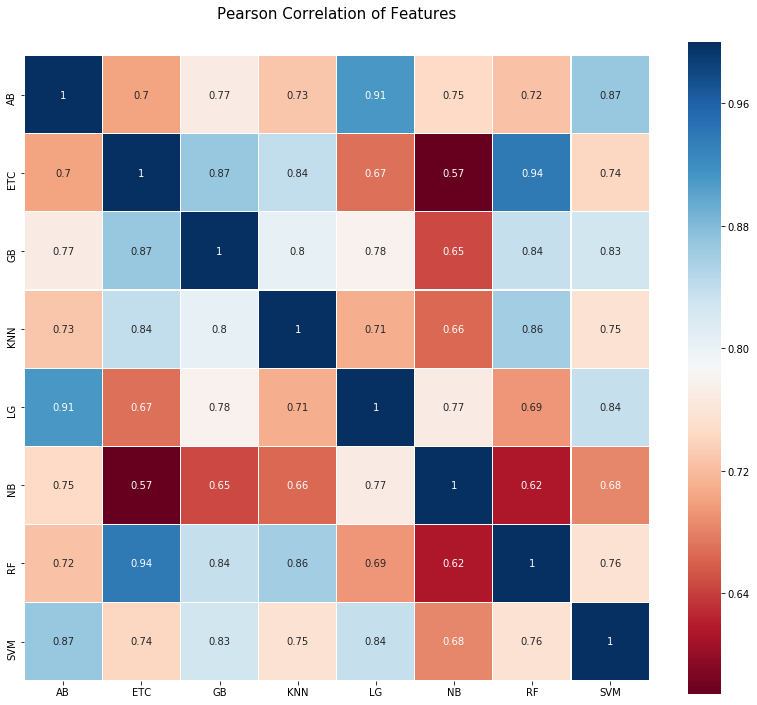

In [25]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(base_predictions_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [66]:
meta = xgb.XGBClassifier(max_depth=2)
meta.fit(base_predictions_train,y_train)

accuracies=cross_val_score(estimator=meta, X=base_predictions_train, y=y_train, cv=10, scoring='accuracy')
print(accuracies.mean())

0.8901674089701516
